In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import scipy.optimize

%matplotlib inline

In [2]:
data_poland = pd.read_csv('poland.csv')
data_poland.dropna(inplace = True)

day_poland = np.array(data_poland['day'])
infected_poland = np.array(data_poland['n'])
delta_poland = np.array(data_poland['delta'])


In [3]:
data_poland

,day,n,delta,daydate,monthdate
0,1,1,1,4,3
1,2,1,0,5,3
2,3,5,4,6,3
3,4,6,1,7,3
4,5,11,5,8,3
5,6,17,6,9,3
6,7,22,5,10,3
7,8,31,9,11,3
8,9,51,20,12,3
9,10,68,17,13,3


In [4]:
def func_expo(x, a, b):
    return a * np.exp(b * x)

def func_logistic(x, x0, k, V):
    return V/(1+np.exp(k*(x-x0)))

def func_geometric(x,a,n):
    return a*x**n

In [5]:
popt_exp, pcov_exp = scipy.optimize.curve_fit(func_expo,  day_poland,  infected_poland)
perr_exp = np.sqrt(np.diag(pcov_exp))

print(u'y = a \u22c5 exp(b \u22C5 x)')  
print(u'a = {:2f} \u00B1 {:2f}\t b = {:2f} \u00B1 {:2f}'.format(popt_exp[0], perr_exp[0], popt_exp[1], perr_exp[1])  )

y = a ⋅ exp(b ⋅ x)
a = 78.277293 ± 8.148811	 b = 0.118634 ± 0.003199


In [6]:
## a bit complicated but...if we want to get finite covariance matrix, we need to do that...
## kk is purely empirical value

kk = 3
popt_sigmoid, pcov_sigmoid = scipy.optimize.curve_fit(func_logistic,  day_poland+kk,  infected_poland)
perr_sigmoid = np.sqrt(np.diag(pcov_sigmoid))
popt_sigmoid[0]-= kk


print(u'y = V/(1+exp(k\u22C5(x-x0))')  

print(u'x0 = {:2f} \u00B1 {:2f}\t k = {:2f} \u00B1 {:2f}\t V = {:2f} \u00B1 {:2f}'.format(popt_sigmoid[0], perr_sigmoid[0], popt_sigmoid[1], perr_sigmoid[1],popt_sigmoid[2], perr_sigmoid[2])  )


y = V/(1+exp(k⋅(x-x0))
x0 = 33.486772 ± 0.472545	 k = -0.175825 ± 0.003962	 V = 8508.543492 ± 350.000736


poland_parameters_logistic = scipy.optimize.curve_fit(func_logistic,  day_poland+kk,  deaths_poland)[0]
poland_parameters_expo = scipy.optimize.curve_fit(func_expo,  day_poland,  deaths_poland)[0]

poland_parameters_logistic

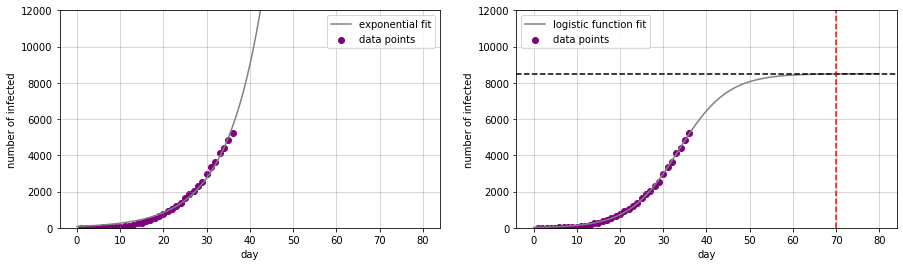

In [9]:
x = np.linspace(0,80,101)
max_y = 12000

a = popt_exp[0]
b = popt_exp[1]
y_expo = func_expo(x, a, b)

x0 = popt_sigmoid[0]
k = popt_sigmoid[1]
V = popt_sigmoid[2]

y_logistic = func_logistic(x,x0,k,V)

fig, axs = plt.subplots(ncols=2, figsize = (15,4))


axs[0].scatter(day_poland, infected_poland, label="data points", color = "purple")
axs[0].plot(x, y_expo, label="exponential fit", color = 'gray')

axs[1].scatter(day_poland, infected_poland, label="data points", color = "purple")
axs[1].plot(x, y_logistic, label="logistic function fit", color = 'gray')
axs[1].axhline(y=V, color='black', linestyle = '--')

axs[1].axvline(x=70, color='red', linestyle = '--')


for ax in axs:
    ax.set_xlabel('day')
    ax.set_ylabel('number of infected')
    ax.set_ylim(0,max_y) 
    ax.legend()
    ax.grid(color = 'gray', alpha = 0.4)

plt.show()

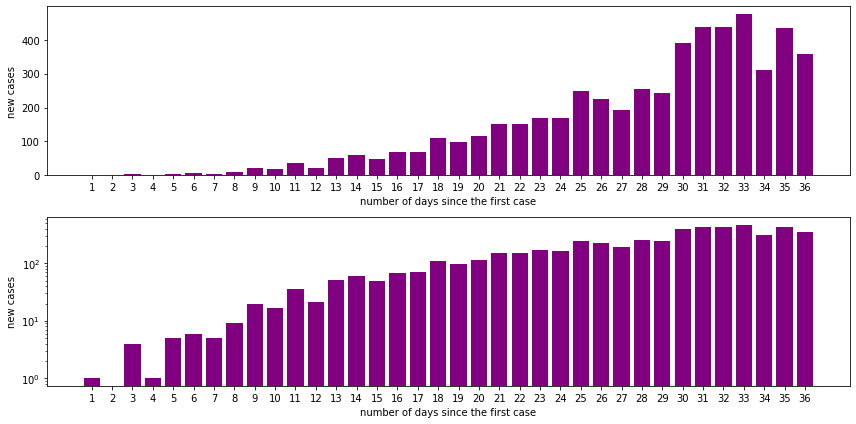

In [10]:
w = 0.8

fig, axs = plt.subplots( nrows =2, figsize=(12,6))

rects = axs[0].bar( day_poland, delta_poland, width= w, label='new cases', color = 'Purple')
rects_log = axs[1].bar( day_poland, delta_poland, width= w, label='new cases', color = 'Purple', log=True)

for ax in axs:
    ax.set_xlabel('number of days since the first case')
    ax.set_ylabel('new cases')
    ax.set_xticks(day_poland)

fig.tight_layout()
plt.show()

In [11]:
popt, pcov =scipy.optimize.curve_fit(func_geometric,  day_poland[:],  delta_poland[:])
perr = np.sqrt(np.diag(pcov))

print("y = a x^n, a= {:2f} +- {:2f} n = {:2f} +- {:2f}".format( popt[0], perr[0],  popt[1], perr[1] )  )

y = a x^n, a= 0.194679 +- 0.122402 n = 2.168566 +- 0.184158


In [12]:
poland_parameters_geometric = scipy.optimize.curve_fit(func_geometric,  day_poland,  delta_poland)[0]
a = poland_parameters_geometric[0]
n = poland_parameters_geometric[1]
n

2.168565714959542

In [ ]:
xx = np.linspace(30,40,11).astype(int)
yy = func_geometric(xx,a,n)
yy

In [ ]:
x = np.linspace(0,40,51)
y_geometric = func_geometric(x,a,n)

fig, axs = plt.subplots( ncols =2, figsize=(12,6))

for ax in axs:
    ax.scatter(day_poland, delta_poland, color = 'purple')
    ax.plot(x,y_geometric, color = 'gray')
    ax.set_xlabel('day')
    ax.set_ylabel('new cases')
    ax.grid(color = 'gray', alpha = 0.4)
    
axs[1].set_yscale('symlog')  #"linear", "log", "symlog", "logit", ...}
axs[1].set_xscale('log') 


In [ ]:
STOOP

In [ ]:
italy_parameters_expo = scipy.optimize.curve_fit(func_expo,  day_italy,  deaths_italy)[0]
italy_parameters_logistic = scipy.optimize.curve_fit(func_logistic,  day_italy,  deaths_italy, method = 'trf', absolute_sigma=False)
italy_parameters_logistic


In [ ]:
x = np.linspace(0,60,101)
max_y = 5500

a = italy_parameters_expo[0]
b = italy_parameters_expo[1]
y_expo = func_expo(x, a, b)

x0 = italy_parameters_logistic[0]
k = italy_parameters_logistic[1]
V = italy_parameters_logistic[2]
y_logistic = func_logistic(x,x0,k,V)

fig, axs = plt.subplots(ncols=2, figsize = (15,4))


axs[0].scatter(day_italy, deaths_italy, label="data points", color = "purple")
axs[0].plot(x, y_expo, label="exponential fit", color = 'gray')

axs[1].scatter(day_italy, deaths_italy, label="data points", color = "purple")
axs[1].plot(x, y_logistic, label="logistic function fit", color = 'gray')
axs[1].axhline(y=V, color='black', linestyle = '--')

for ax in axs:
    ax.set_xlabel('day')
    ax.set_ylabel('number of infected')
    ax.set_ylim(0,max_y) 
    ax.legend()
    ax.grid(color = 'gray', alpha = 0.4)

plt.show()